In [1]:
!pip install riotwatcher
# !pip install ft2font
# !conda install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
import requests

In [3]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

import sys,os
file_path = os.path.join(sys.path[0], ".secret/riotapi.json")

keys = get_keys(file_path)
API_Key = keys['API_Key']


In [4]:
from riotwatcher import LolWatcher, ApiError

lol_watcher = LolWatcher(API_Key)

my_region = 'na1'

me = lol_watcher.summoner.by_name(my_region, 'thereiswald0')
print(me)

{'id': 'CEZ_jABSxvR1TdixfaW3GYZHfPtG2tpzZif-D3wQX-mWiBtxEpdohABC5A', 'accountId': 'v6JbmY1B_bNB7bmSUXaSG_toYdT2NvPz0DLr6uzMOM9gfE21JLs-JrbE', 'puuid': 'fHYPY_kTTCySAwpml6J2kHgxoe3yBmiwjZvqK2piE4FkPSSYfdJqaKkzTj6SAecAfqzQaLbjFCLoTg', 'name': 'thereiswald0', 'profileIconId': 3543, 'revisionDate': 1616465462000, 'summonerLevel': 11}


In [5]:
# I haven't played any ranked games but here is how I could print them
my_ranked_stats = lol_watcher.league.by_summoner(my_region, me['id'])
print(my_ranked_stats)

[]


In [6]:
# First we get the latest version of the game from data dragon
versions = lol_watcher.data_dragon.versions_for_region(my_region)
champions_version = versions['n']['champion']

# Lets get some champions
current_champ_list = lol_watcher.data_dragon.champions(champions_version)
# print(current_champ_list)

Show the main champions that we all use and how they rank in each category. Then do simulations to help explain ap/mr, ad/armour. Finally show the effect of items. Item spike in damage, item percentage of stats at different levels, fully spec'd out what does tha mean.

In [7]:
my_matches = lol_watcher.match.matchlist_by_account(my_region, me['accountId'])

# fetch last match detail
last_match = my_matches['matches'][0]
match_detail = lol_watcher.match.by_id(my_region, last_match['gameId'])

participants = []
for row in match_detail['participants']:
    participants_row = {}
    participants_row['champion'] = row['championId']
    participants_row['spell1'] = row['spell1Id']
    participants_row['spell2'] = row['spell2Id']
    participants_row['win'] = row['stats']['win']
    participants_row['kills'] = row['stats']['kills']
    participants_row['deaths'] = row['stats']['deaths']
    participants_row['assists'] = row['stats']['assists']
    participants_row['totalDamageDealt'] = row['stats']['totalDamageDealt']
    participants_row['goldEarned'] = row['stats']['goldEarned']
    participants_row['champLevel'] = row['stats']['champLevel']
    participants_row['totalMinionsKilled'] = row['stats']['totalMinionsKilled']
    participants_row['item0'] = row['stats']['item0']
    participants_row['item1'] = row['stats']['item1']
    participants.append(participants_row)
df = pd.DataFrame(participants)
df

,assists,champLevel,champion,deaths,goldEarned,item0,item1,kills,spell1,spell2,totalDamageDealt,totalMinionsKilled,win
0,3,18,234,4,20875,3133,3153,38,4,12,191574,177,True
1,13,15,20,3,9970,3068,3047,1,11,4,153986,45,True
2,3,14,122,8,9368,1054,3047,6,6,4,93097,95,True
3,8,14,266,6,8302,1054,6630,4,4,7,71202,83,True
4,7,14,54,5,7743,1054,3047,5,4,7,52420,34,True
5,10,15,96,11,10855,6677,6673,5,0,0,99111,131,False
6,7,15,24,8,11247,1036,3047,8,0,0,106697,94,False
7,9,14,103,12,7373,1056,3020,2,0,0,72285,90,False
8,7,14,26,13,9961,3860,4005,6,0,0,75480,77,False
9,7,14,86,10,8950,1055,6631,5,0,0,83453,98,False


In [8]:
# check league's latest version
latest = lol_watcher.data_dragon.versions_for_region(my_region)['n']['champion']
# Lets get some champions static information
static_champ_list = lol_watcher.data_dragon.champions(latest, False, 'en_US')

# champ static list data to dict for looking up
champ_dict = {}
for key in static_champ_list['data']:
    row = static_champ_list['data'][key]
    champ_dict[row['key']] = row['id']
for row in participants:
    print(str(row['champion']) + ' ' + champ_dict[str(row['champion'])])
    row['championName'] = champ_dict[str(row['champion'])]

# print dataframe
df = pd.DataFrame(participants)
df

234 Viego
20 Nunu
122 Darius
266 Aatrox
54 Malphite
96 KogMaw
24 Jax
103 Ahri
26 Zilean
86 Garen


,assists,champLevel,champion,championName,deaths,goldEarned,item0,item1,kills,spell1,spell2,totalDamageDealt,totalMinionsKilled,win
0,3,18,234,Viego,4,20875,3133,3153,38,4,12,191574,177,True
1,13,15,20,Nunu,3,9970,3068,3047,1,11,4,153986,45,True
2,3,14,122,Darius,8,9368,1054,3047,6,6,4,93097,95,True
3,8,14,266,Aatrox,6,8302,1054,6630,4,4,7,71202,83,True
4,7,14,54,Malphite,5,7743,1054,3047,5,4,7,52420,34,True
5,10,15,96,KogMaw,11,10855,6677,6673,5,0,0,99111,131,False
6,7,15,24,Jax,8,11247,1036,3047,8,0,0,106697,94,False
7,9,14,103,Ahri,12,7373,1056,3020,2,0,0,72285,90,False
8,7,14,26,Zilean,13,9961,3860,4005,6,0,0,75480,77,False
9,7,14,86,Garen,10,8950,1055,6631,5,0,0,83453,98,False


In [9]:
champs = pd.DataFrame.from_dict(static_champ_list['data'])

In [33]:
champs

,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,AurelionSol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
blurb,Once honored defenders of Shurima against the ...,Innately connected to the latent power of Rune...,Abandoning the Kinkou Order and her title of t...,Always a mighty warrior with a fearsome reputa...,Legend claims that Amumu is a lonely and melan...,Anivia is a benevolent winged spirit who endur...,"Dangerous, yet disarmingly precocious, Annie i...",Emerging from moonlight's shadow with weapons ...,"Iceborn warmother of the Avarosan tribe, Ashe ...",Aurelion Sol once graced the vast emptiness of...,...,"An Ionian of deep resolve, Yasuo is an agile s...","In life, he was Yone—half-brother of Yasuo, an...",The last survivor of a long-forgotten religiou...,"A magical cat from Bandle City, Yuumi was once...",Zac is the product of a toxic spill that ran t...,"Utterly ruthless and without mercy, Zed is the...","With a love of big bombs and short fuses, the ...","Once a powerful Icathian mage, Zilean became o...","As the embodiment of mischief, imagination, an...","Born in an ancient, sorcerous catastrophe, Zyr..."
id,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,AurelionSol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
image,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","{'full': 'Ahri.png', 'sprite': 'champion0.png'...","{'full': 'Akali.png', 'sprite': 'champion0.png...","{'full': 'Alistar.png', 'sprite': 'champion0.p...","{'full': 'Amumu.png', 'sprite': 'champion0.png...","{'full': 'Anivia.png', 'sprite': 'champion0.pn...","{'full': 'Annie.png', 'sprite': 'champion0.png...","{'full': 'Aphelios.png', 'sprite': 'champion0....","{'full': 'Ashe.png', 'sprite': 'champion0.png'...","{'full': 'AurelionSol.png', 'sprite': 'champio...",...,"{'full': 'Yasuo.png', 'sprite': 'champion4.png...","{'full': 'Yone.png', 'sprite': 'champion4.png'...","{'full': 'Yorick.png', 'sprite': 'champion4.pn...","{'full': 'Yuumi.png', 'sprite': 'champion4.png...","{'full': 'Zac.png', 'sprite': 'champion4.png',...","{'full': 'Zed.png', 'sprite': 'champion4.png',...","{'full': 'Ziggs.png', 'sprite': 'champion5.png...","{'full': 'Zilean.png', 'sprite': 'champion5.pn...","{'full': 'Zoe.png', 'sprite': 'champion5.png',...","{'full': 'Zyra.png', 'sprite': 'champion5.png'..."
info,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...","{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...","{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...","{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...","{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...","{'attack': 1, 'defense': 4, 'magic': 10, 'diff...","{'attack': 2, 'defense': 3, 'magic': 10, 'diff...","{'attack': 6, 'defense': 2, 'magic': 1, 'diffi...","{'attack': 7, 'defense': 3, 'magic': 2, 'diffi...","{'attack': 2, 'defense': 3, 'magic': 8, 'diffi...",...,"{'attack': 8, 'defense': 4, 'magic': 4, 'diffi...","{'attack': 8, 'defense': 4, 'magic': 4, 'diffi...","{'attack': 6, 'defense': 6, 'magic': 4, 'diffi...","{'attack': 5, 'defense': 1, 'magic': 8, 'diffi...","{'attack': 3, 'defense': 7, 'magic': 7, 'diffi...","{'attack': 9, 'defense': 2, 'magic': 1, 'diffi...","{'attack': 2, 'defense': 4, 'magic': 9, 'diffi...","{'attack': 2, 'defense': 5, 'magic': 8, 'diffi...","{'attack': 1, 'defense': 7, 'magic': 8, 'diffi...","{'attack': 4, 'defense': 3, 'magic': 8, 'diffi..."
key,266,103,84,12,32,34,1,523,22,136,...,157,777,83,350,154,238,115,26,142,143
name,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,Aurelion Sol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
partype,Blood Well,Mana,Energy,Mana,Mana,Mana,Mana,Mana,Mana,Mana,...,Flow,Flow,Mana,Mana,None,Energy,Mana,Mana,Mana,Mana
stats,"{'hp': 580, 'hpperlevel': 90, 'mp': 0, 'mpperl...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","{'hp': 500, 'hpperlevel': 105, 'mp': 200, 'mpp...","{'hp': 600, 'hpperlevel': 106, 'mp': 350, 'mpp...","{'hp': 615, 'hpperlevel': 80, 'mp': 285, 'mppe...","{'hp':

In [34]:
# champs
champ_stats['tags'] = champs.T['tags']
champ_stats['partype'] = champs.T['partype']

In [35]:
champ_stats

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,...,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,tags,partype
Orianna,530.0,91.0,418.00,25.0,325.0,17.0,3.00,26.0,0.50,525.0,...,8.00,0.80,0.0,0.0,40.0,2.60,3.50,0.658,"[Mage, Support]",Mana
Janna,500.0,70.0,350.00,64.0,315.0,28.0,3.80,30.0,0.50,550.0,...,11.50,0.40,0.0,0.0,46.0,1.50,2.95,0.625,"[Support, Mage]",Mana
Karthus,550.0,87.0,467.00,30.5,335.0,18.0,3.50,30.0,0.50,450.0,...,8.00,0.80,0.0,0.0,46.0,3.25,2.11,0.625,[Mage],Mana
Lulu,525.0,74.0,350.00,55.0,330.0,29.0,3.70,30.0,0.50,550.0,...,11.00,0.60,0.0,0.0,47.0,2.60,2.25,0.625,"[Support, Mage]",Mana
Neeko,540.0,90.0,450.00,30.0,340.0,21.0,4.00,30.0,0.50,550.0,...,7.00,0.70,0.0,0.0,48.0,2.50,3.50,0.625,"[Mage, Support]",Mana
Kennen,541.0,84.0,200.00,0.0,335.0,29.0,3.75,30.0,0.50,550.0,...,50.00,0.00,0.0,0.0,48.0,3.75,3.40,0.625,"[Mage, Marksman]",Energy
Sona,480.0,77.0,340.00,45.0,325.0,28.0,3.30,30.0,0.50,550.0,...,11.50,0.40,0.0,0.0,49.0,3.00,2.30,0.644,"[Support, Mage]",Mana
Soraka,535.0,74.0,425.00,40.0,325.0,32.0,3.80,30.0,0.50,550.0,...,11.50,0.40,0.0,0.0,50.0,3.00,2.14,0.625,"[Support, Mage]",Mana
Senna,520.0,75.0,350.00,45.0,330.0,28.0,3.50,30.0,0.50,600.0,...,11.50,0.40,0.0,0.0,50.0,0.00,4.00,0.625,"[Marksman, Support]",Mana
Ivern,585.0,85.0,450.00,60.0,330.0,27.0,3.50,32.0,1.25,475.0,...,6.00,0.75,0.0,0.0,50.0,3.00,3.40,0.644,"[Support, Mage]",Mana


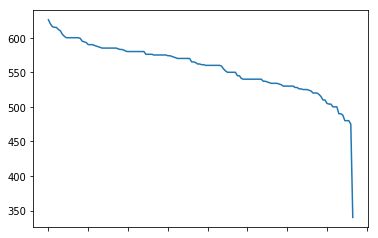

In [36]:
champ_stats = pd.DataFrame()
for champ in list(champs.columns):
#     champ_stats[champ] = champs.loc['stats'][champ]
#     champ_stats.index = list(champs.loc['stats'][champ].keys())
    champ_stats[champ] = champs.loc['stats'][champ].values()
champ_stats = champ_stats.set_index([pd.Index(list(champs.loc['stats'][champ].keys()))])
champ_stats = champ_stats.T # transpose so it's easier to manipulate the data
# add a couple more columns
champ_stats['tags'] = champs.T['tags']
champ_stats['partype'] = champs.T['partype']
champ_stats = champ_stats.sort_values(by=['hp'], ascending=False)
champ_stats['hp'].plot()
# champ_stats

In [37]:
champ_stats = champ_stats.sort_values(by=['attackdamage'], ascending=True)

In [38]:
champ_stats.to_csv('champ_stats.csv')
champ_stats = pd.read_csv('champ_stats.csv', index_col=0)

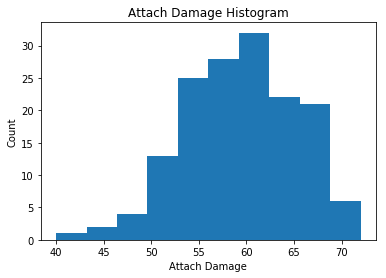

In [15]:
# plt.bar(champ_stats.index, champ_stats['attackdamage'])
plt.hist(champ_stats['attackdamage'], density=False, bins=10)  # density=False would make counts, True is probability
plt.ylabel('Count')
plt.xlabel('Attach Damage')
plt.title('Attach Damage Histogram');
plt.show()

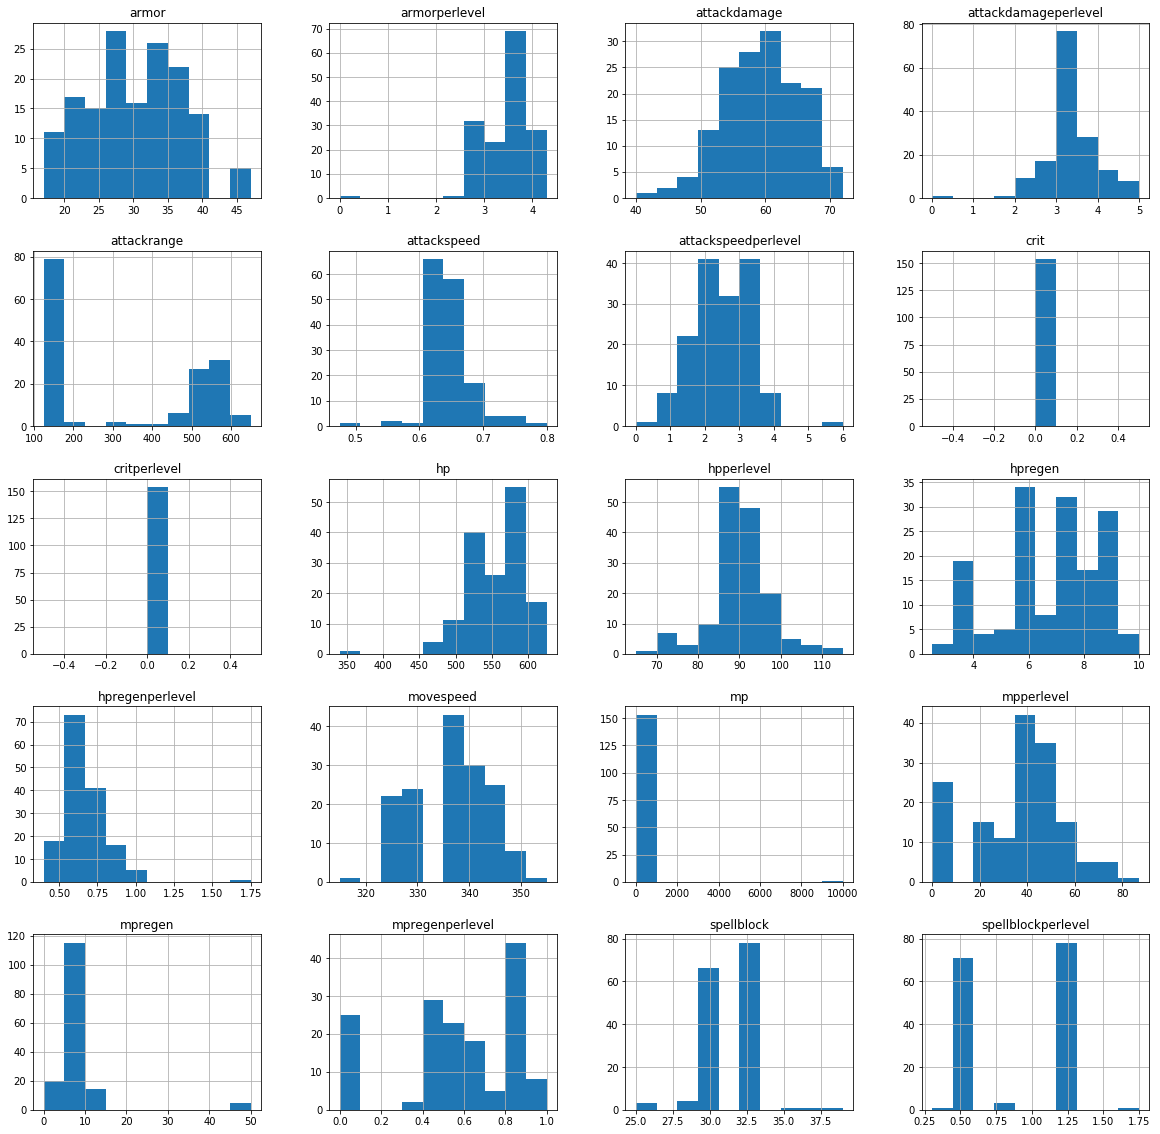

In [16]:
champ_stats.hist(figsize=(20,20))
plt.show()

In [17]:
champ_stats.describe()

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.0,154.0,154.000000,154.000000,154.000000,154.000000
mean,556.424675,88.954545,375.408831,36.629870,336.155844,29.805195,3.467208,31.021429,0.891558,325.032468,6.592532,0.665909,8.262078,0.550584,0.0,0.0,59.365974,3.234621,2.488682,0.646597
std,37.302384,7.214130,789.468244,20.004314,7.439631,6.703894,0.457629,1.599753,0.379663,194.621719,1.788661,0.160443,8.233780,0.290646,0.0,0.0,5.945627,0.653715,0.851860,0.035254
min,340.000000,65.000000,0.000000,0.000000,315.000000,17.000000,0.000000,25.000000,0.300000,125.000000,2.500000,0.400000,0.000000,0.000000,0.0,0.0,40.000000,0.000000,0.000000,0.475000
25%,534.000000,85.000000,280.000000,25.250000,330.000000,24.250000,3.250000,30.000000,0.500000,125.000000,5.500000,0.550000,6.500000,0.400000,0.0,0.0,55.000000,3.000000,2.000000,0.625000
50%,561.500000,90.000000,326.500000,40.000000,335.000000,29.000000,3.500000,32.000000,1.250000,175.000000,7.000000,0.600000,7.585000,0.600000,0.0,0.0,60.000000,3.125800,2.500000,0.640000
75%,581.600000,93.000000,376.650000,50.000000,340.000000,35.000000,3.750000,32.000000,1.250000,525.000000,8.000000,0.750000,8.000000,0.800000,0.0,0.0,64.000000,3.500000,3.175000,0.658000
max,626.000000,115.000000,10000.000000,87.000000,355.000000,47.000000,4.300000,39.000000,1.750000,650.000000,10.000000,1.750000,50.000000,1.000000,0.0,0.0,72.000000,5.000000,6.000000,0.800000


# Why Jungle?
When playing against the AI as a beginner, the AI chooses to have two champions in the top lane, one in the mid-lane and two in the bottom lane. At higher level play this is not seen as the meta. Instead the top-lane usually has one champion and the 5th player roams the jungle, the forested area of the map between the lanes, and "clears" the jungle camps. There are reasons for this like the ability to gank (sneak up on enemies and suprise attack them), but we will focus on the more core reasons why jungling is an important position in League of Legends. Namely, getting the most gold and experience out of the map.
## There's gold in them thar jungles

## Gold in Lane

In [18]:
# gold, solo xp pre reduction
# melee_minion = [21, 0.2, 65]
# caster_minion = [14, 0.2, 32]
# siege_minion = [60, 0.5, 100]
# wave_gold_total = 0
# basic_minion_gold_scaling =  0
#wave 13  still 21 and 14

# wave gold doesn't seem to scale
# for wave in range(0,10):
#     print(wave+1)
# #     wave_gold = 3*(melee_minion[0]+wave*melee_minion[1])+3*(caster_minion[0]+wave*caster_minion[1])
#     wave_gold = 3*(melee_minion[0]+basic_minion_gold_scaling)+3*(caster_minion[0]+basic_minion_gold_scaling)
#     if (((wave+1)%3==0) and (wave>0)): #checking for every third wave
#         wave_gold += siege_minion[0]+((wave+1)/3-1)*siege_minion[1] # adding siege
#         basic_minion_gold_scaling +=  ((wave+1)/3)*melee_minion[1] # increasing scaling
#         wave_gold +=  6*basic_minion_gold_scaling
#     wave_gold = round(wave_gold,2) #cleaning up floating point errors
# #     wave_gold = 3*(melee_minion[0]+melee_minion[1])+3*(caster_minion[0]+caster_minion[1])
#     wave_gold_total += wave_gold
#     print(wave_gold)

melee_minion = 21
caster_minion = 14
siege_minion = 60
wave_gold_total = 0
first_wave_time = 100 #1:40 or 100s
# time_list = 
print('wave, time is sec')
print(1, first_wave_time)
for wave in range(0,10):
    wave_gold = 3*(melee_minion)+3*(caster_minion)
    if (((wave+1)%3==0) and (wave>0)): #checking for every third wave
        wave_gold += siege_minion
    wave_gold = round(wave_gold,2) #cleaning up floating point errors
#     wave_gold = 3*(melee_minion[0]+melee_minion[1])+3*(caster_minion[0]+caster_minion[1])
    wave_gold_total += wave_gold
    print(wave_gold, wave_gold_total)
    print('wave, time is sec')
    print(wave+2, 100+(wave+1)*30)

wave, time is sec
1 100
105 105
wave, time is sec
2 130
105 210
wave, time is sec
3 160
165 375
wave, time is sec
4 190
105 480
wave, time is sec
5 220
105 585
wave, time is sec
6 250
165 750
wave, time is sec
7 280
105 855
wave, time is sec
8 310
105 960
wave, time is sec
9 340
165 1125
wave, time is sec
10 370
105 1230
wave, time is sec
11 400


In [19]:
wave_gold_total

1230

In [20]:
# 5 min respawn
blue = 100
red = 100
# 2 min respawn
gromp = 105
wolves = 15+15+55
raptors = 8*5+45
krugs = 42+7*3+12*6
#can be full cleared by 3:15
#2.5min respawn
scuttle = 77
print(blue+red+gromp+wolves+raptors+krugs)

610


In [21]:
def save_champ_image(lol_watcher, version, my_region, champ):
    version = lol_watcher.data_dragon.versions_for_region(my_region)
    champion_icon_dict = lol_watcher.data_dragon.champions(version['n']['champion'])
    ic = champion_icon_dict['data']['Aatrox']['image']['full']
    cdn = version['cdn']
    v = version['v']
    url = f'{cdn}/{v}/img/champion/{ic}'
    champion_icon = Image.open(requests.get(url, stream=True).raw)
    champion_icon.save(str(champ)+'.png')
    return champion_icon

In [22]:
# Image.save(requests.get(url, stream=True).raw)
champ_list = ['Aatrox', 'Darius', 'Malphite', 'Riven', 'Tristana', 'Warwick']
for champ in champ_list:
    save_champ_image(lol_watcher, version, my_region, champ)

NameError: name 'version' is not defined

In [ ]:
champs

# League of Legends Language
## Word Cloud

As someone new to the game, I don't have a grasp on the lore of League of Legends. At glance I want to understand it, and a good option for that is a word cloud of the character blurbs.

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 

for val in champs.T['blurb']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wc_width = 20
wc_height = 15
wordcloud = WordCloud(width = wc_width*100, height = wc_height*100, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (wc_width, wc_height), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# league_mask = np.array(Image.open("league_icon.png"))
league_mask = np.array(Image.open("Untitled.png"))
# np.flatten(league_mask)
# league_mask = league_mask.flatten()
league_mask = league_mask.transpose(2,0,1).reshape(-1,league_mask.shape[1])
league_mask

In [ ]:
league_mask = league_mask[0:int(league_mask.shape[0]/4)]

In [ ]:
# league_mask[0:int(league_mask.shape[0]/4)].shape
league_mask.shape

In [ ]:
np.unique(league_mask)

In [ ]:
# def transform_format(val):
#     if val == 0:
#         return 255
#     else:
#         return val
def transform_format(val):
    if val != 255:
        return 0
#     elif val == 0:
#         return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_league_mask = np.ndarray((league_mask.shape[0],league_mask.shape[1]), np.int32)

for i in range(len(league_mask)):
    transformed_league_mask[i] = list(map(transform_format, league_mask[i]))

In [ ]:
# transformed_league_mask
comment_words

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_league_mask,
               stopwords=stopwords, contour_width=3, contour_color='black')

# Generate a wordcloud
wc.generate(comment_words)

# # store to file
# wc.to_file("img/wine.png")

# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## New Character Blurb Creation
From the blurbs what if we tried to make a new champion, what would the blurb look like. Well we can train an nlp algorithm to take a stab at it.